**<h1 align="center" font="bold">Dry Beans Classification</font></h1>**

<center>
    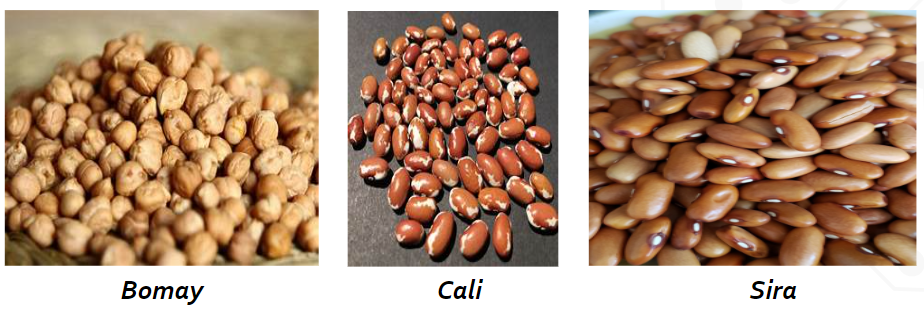
</center>

### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
* [Introduction : Dry Beans Classification](#Introduction-:-Dry-Beans-Classification)
  * [Objective](http://)
  * [Data Dictionary](#Data-Dictionary)   
* [Data Exploration](#Data-Exploration)
* [ Data Preprocessing](#Data-Preprocessing)
     * [Handle Missing Values](#Handle-Missing-Values)
     * [Label Encoding](Label-Encoding)
* [Data Visualization](#Data-Visualization)
* [Feature Engineering](#Feature-Engineering)
    * [Feature Selection](#Feature-Selection)
    * [Feature Scaling](#Feature-Scaling)
* [Model Engineering](#Model-Engineering)
* [Model Evaluation](#Model-Evaluation)
* [Model Comparison](#Model-Comparison)

# Introduction : Dry Beans Classification

The "Dry Beans Classification" project aims to predict and classify three distinct categories of dry beans: Bombay, Cali, and Sira. This classification is based on measurements of five significant features: Area, Perimeter, MajorAxisLength, MinorAxisLength, and Roundness, each measured in millimeters. The dataset contains a total of 150 samples, with 50 samples from each of the three dry bean varieties.

* **Objective**

The primary objective of this project is to build a machine learning model that can accurately classify dry beans into one of the three categories (Bombay, Cali, or Sira) based on the provided measurements. 

* **Data Dictionary**

The dataset includes the following features :

1. Class: The categorical variable representing the three categories of dry beans – Bombay, Cali, and Sira.
2. Area: The area of a dry bean sample, measured in millimeters squared (mm²).
3. Perimeter: The perimeter or circumference of a dry bean sample, measured in millimeters (mm).
4. MajorAxisLength: The length of the major axis of a dry bean, measured in millimeters (mm).
5. MinorAxisLength: The length of the minor axis of a dry bean, measured in millimeters (mm).
6. Roundness: A measurement indicating the roundness or shape of the dry bean. The specific method of calculation may vary, but it represents a dimensionless value related to the bean's shape.

In [796]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/dry-bean/Dry_Bean_Dataset.xlsx


In [797]:
!pip install pandas_profiling

In [798]:
data = pd.read_excel('/kaggle/input/dry-bean/Dry_Bean_Dataset.xlsx')

# Data Exploration

In [799]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,roundnes,Class
0,114004,1279.356,451.361256,323.747996,0.875280,BOMBAY
1,117034,1265.926,425.923787,351.215109,0.917710,BOMBAY
2,126503,1326.959,475.772459,339.381887,0.902809,BOMBAY
3,128118,1360.135,504.024964,NaN,0.870274,BOMBAY
4,129409,1348.888,484.364424,341.172659,0.893763,BOMBAY
...,...,...,...,...,...,...
145,35476,711.317,266.850828,169.928349,0.881086,SIRA
146,35506,713.086,262.106215,173.247828,0.877461,SIRA
147,35561,708.141,259.768348,174.810552,0.891137,SIRA
148,35570,710.530,263.260383,173.378732,0.885378,SIRA


In [800]:
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [801]:
data.shape

(150, 6)

In [802]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,roundnes
count,150.000000,150.000000,150.000000,149.000000,150.000000
mean,75557.933333,999.372293,370.564985,240.245914,0.875078
std,44232.034170,293.752695,105.115378,75.490630,0.034295
min,31519.000000,668.106000,233.804968,157.802740,0.688618
25%,35139.250000,708.690000,264.743366,175.379706,0.855589
50%,56756.500000,914.957000,352.010221,206.618773,0.880003
75%,132879.500000,1369.277750,497.101354,338.364472,0.893303
max,144079.000000,1463.258000,540.677823,376.550241,0.954104


In [803]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             150 non-null    int64  
 1   Perimeter        150 non-null    float64
 2   MajorAxisLength  150 non-null    float64
 3   MinorAxisLength  149 non-null    float64
 4   roundnes         150 non-null    float64
 5   Class            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [804]:
# finding no of rows and no of columns in data set
print('number of rows:',data.shape[0])
print('number of columns:',data.shape[1])

number of rows: 150
number of columns: 6


In [805]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [806]:
data.duplicated().sum()

0

In [807]:
data.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
roundnes           float64
Class               object
dtype: object

In [808]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'roundnes',
       'Class'],
      dtype='object')

In [809]:
data['Class'].unique()

array(['BOMBAY', 'CALI', 'SIRA'], dtype=object)

In [810]:
data['Class'].value_counts()

Class
BOMBAY    50
CALI      50
SIRA      50
Name: count, dtype: int64

In [811]:
data.isnull().sum().sort_values(ascending=False)

MinorAxisLength    1
Area               0
Perimeter          0
MajorAxisLength    0
roundnes           0
Class              0
dtype: int64

In [812]:
data['MinorAxisLength']

0      323.747996
1      351.215109
2      339.381887
3             NaN
4      341.172659
          ...    
145    169.928349
146    173.247828
147    174.810552
148    173.378732
149    173.493726
Name: MinorAxisLength, Length: 150, dtype: float64

In [813]:
rows_with_null_minor = data[data['MinorAxisLength'].isnull()]
rows_with_null_minor

,Area,Perimeter,MajorAxisLength,MinorAxisLength,roundnes,Class
3,128118,1360.135,504.024964,NaN,0.870274,BOMBAY


# Data Visualization

* **Relationships between Features dataset**

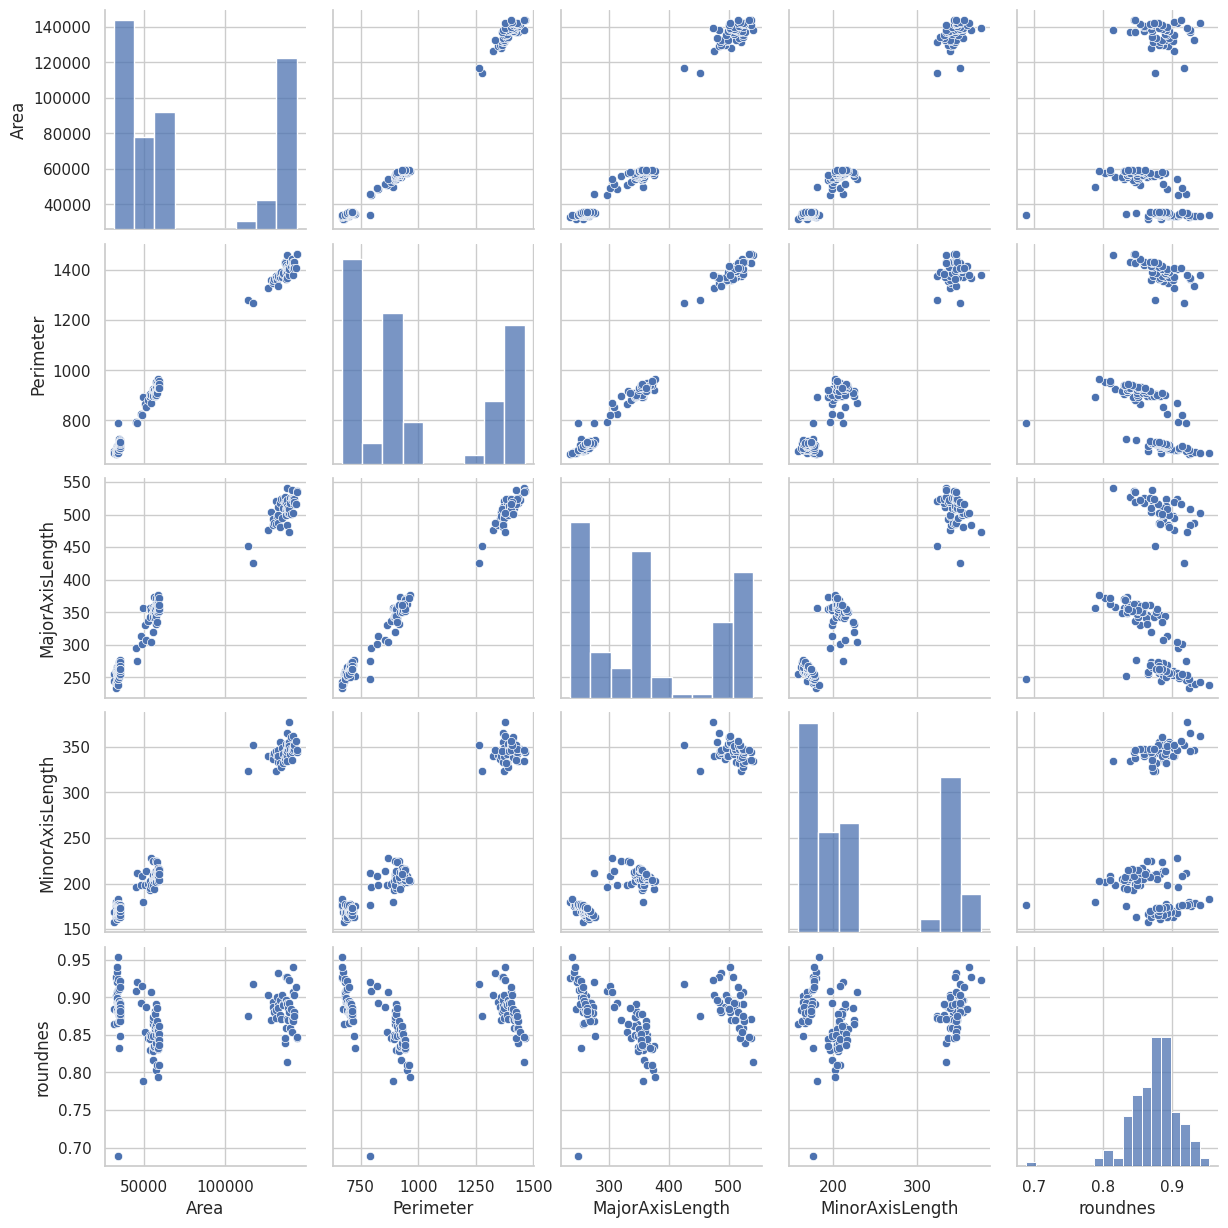

In [814]:
sns.set(style="whitegrid")  
sns.pairplot(data,palette = 'Set2')

* **Display distribution of values in each feature**

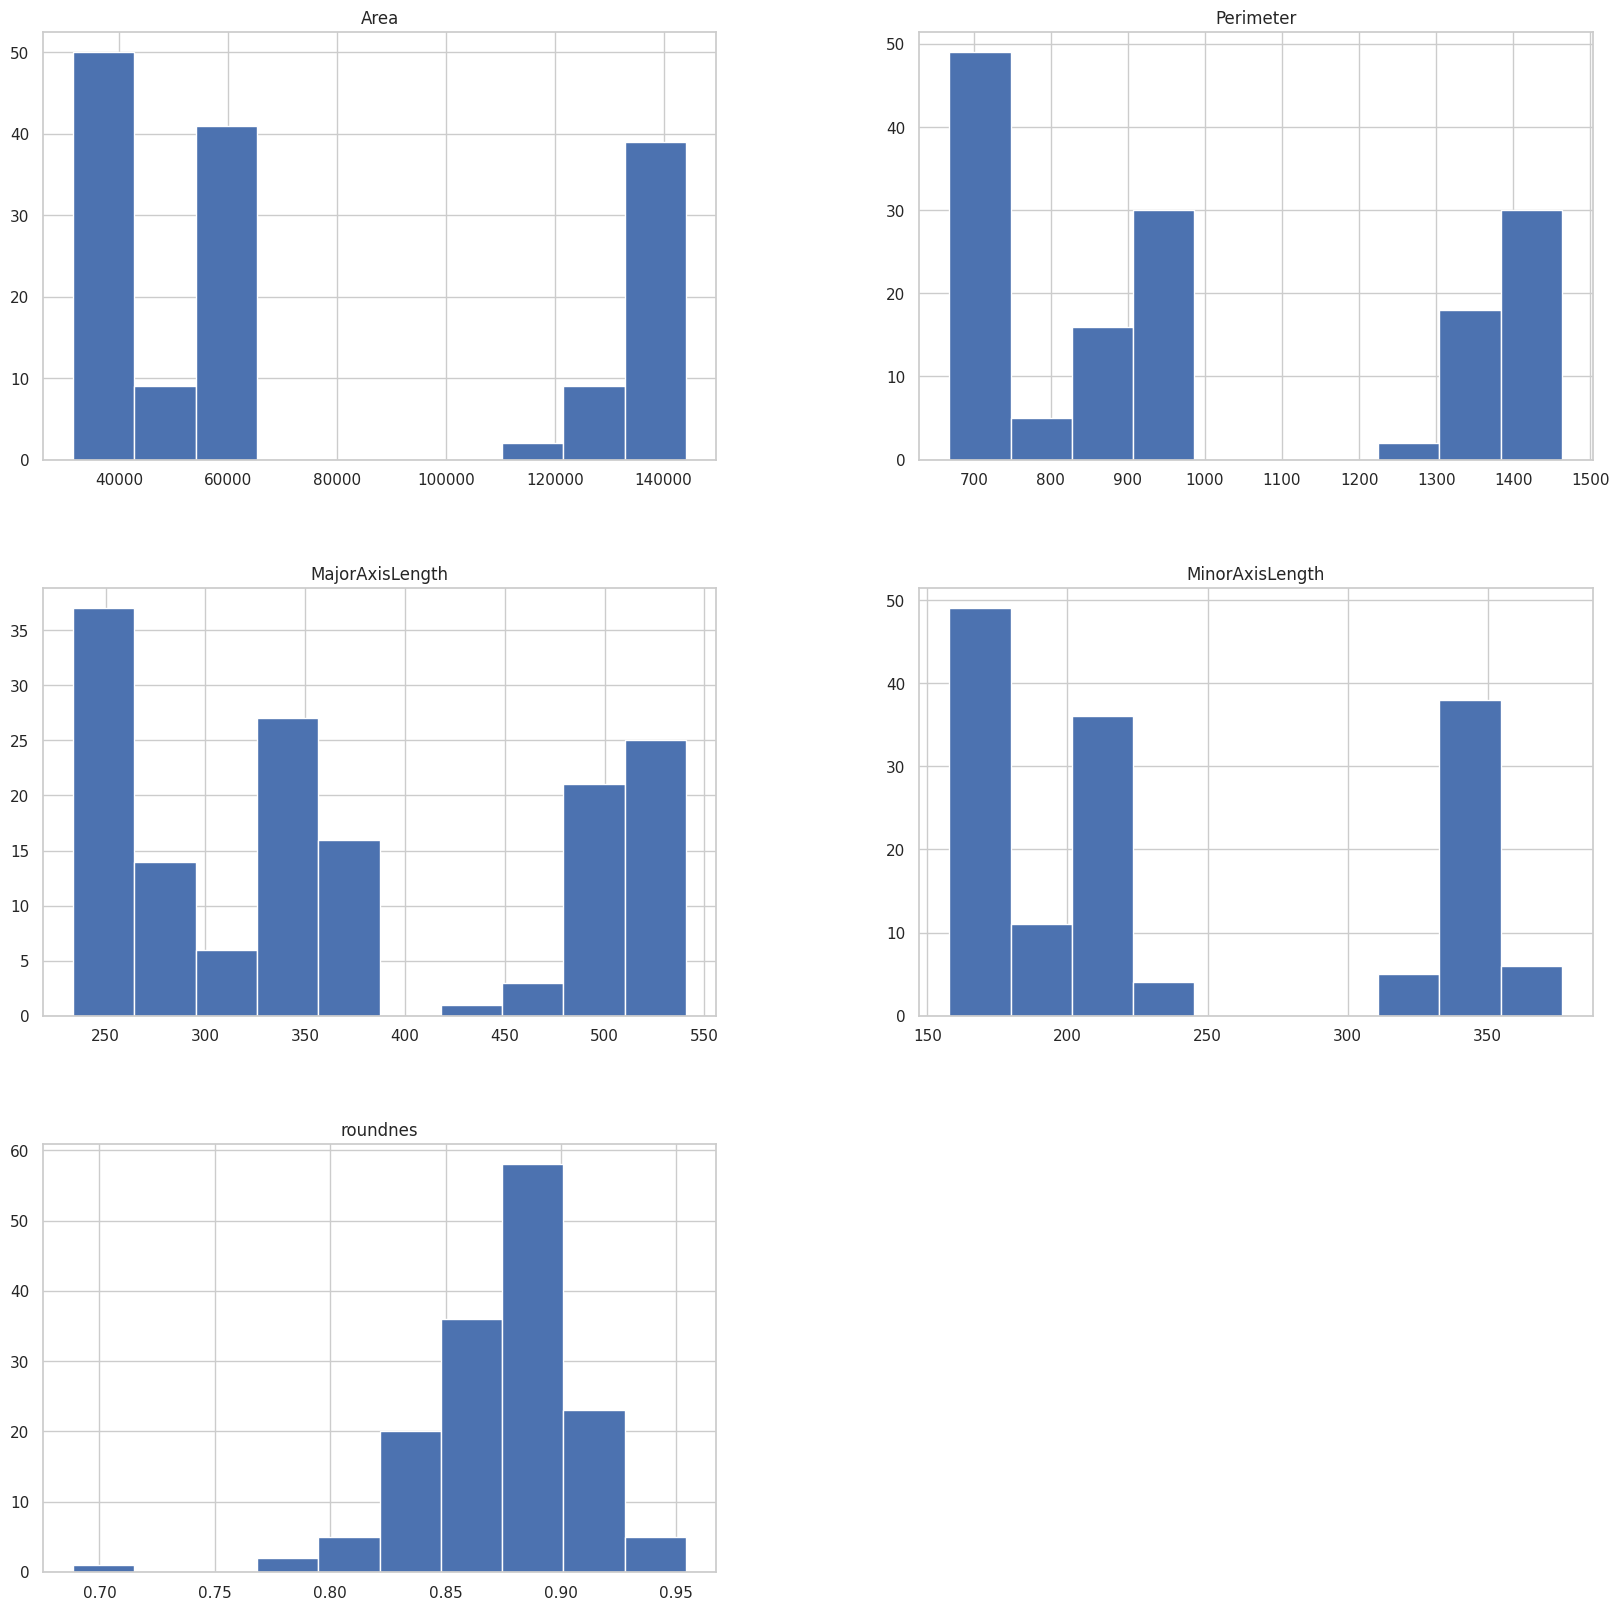

In [815]:
data.hist(figsize=(20,20));

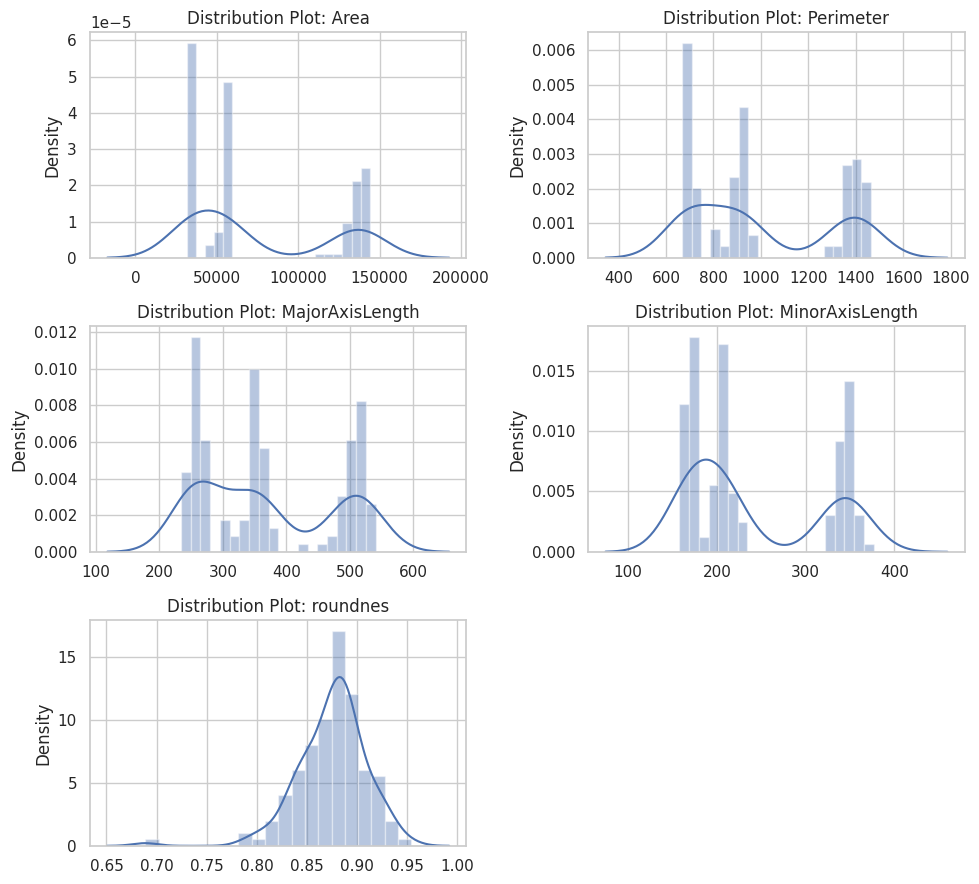

In [816]:
columns = [col for col in data.columns if col != 'Class']
num_rows = 3
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))

axes = axes.flatten()

for i, column in enumerate(columns):
    if i < len(axes): 
        sns.distplot(data[column], bins=20, ax=axes[i])
        axes[i].set_title(f'Distribution Plot: {column}')
        axes[i].set_xlabel('')

for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

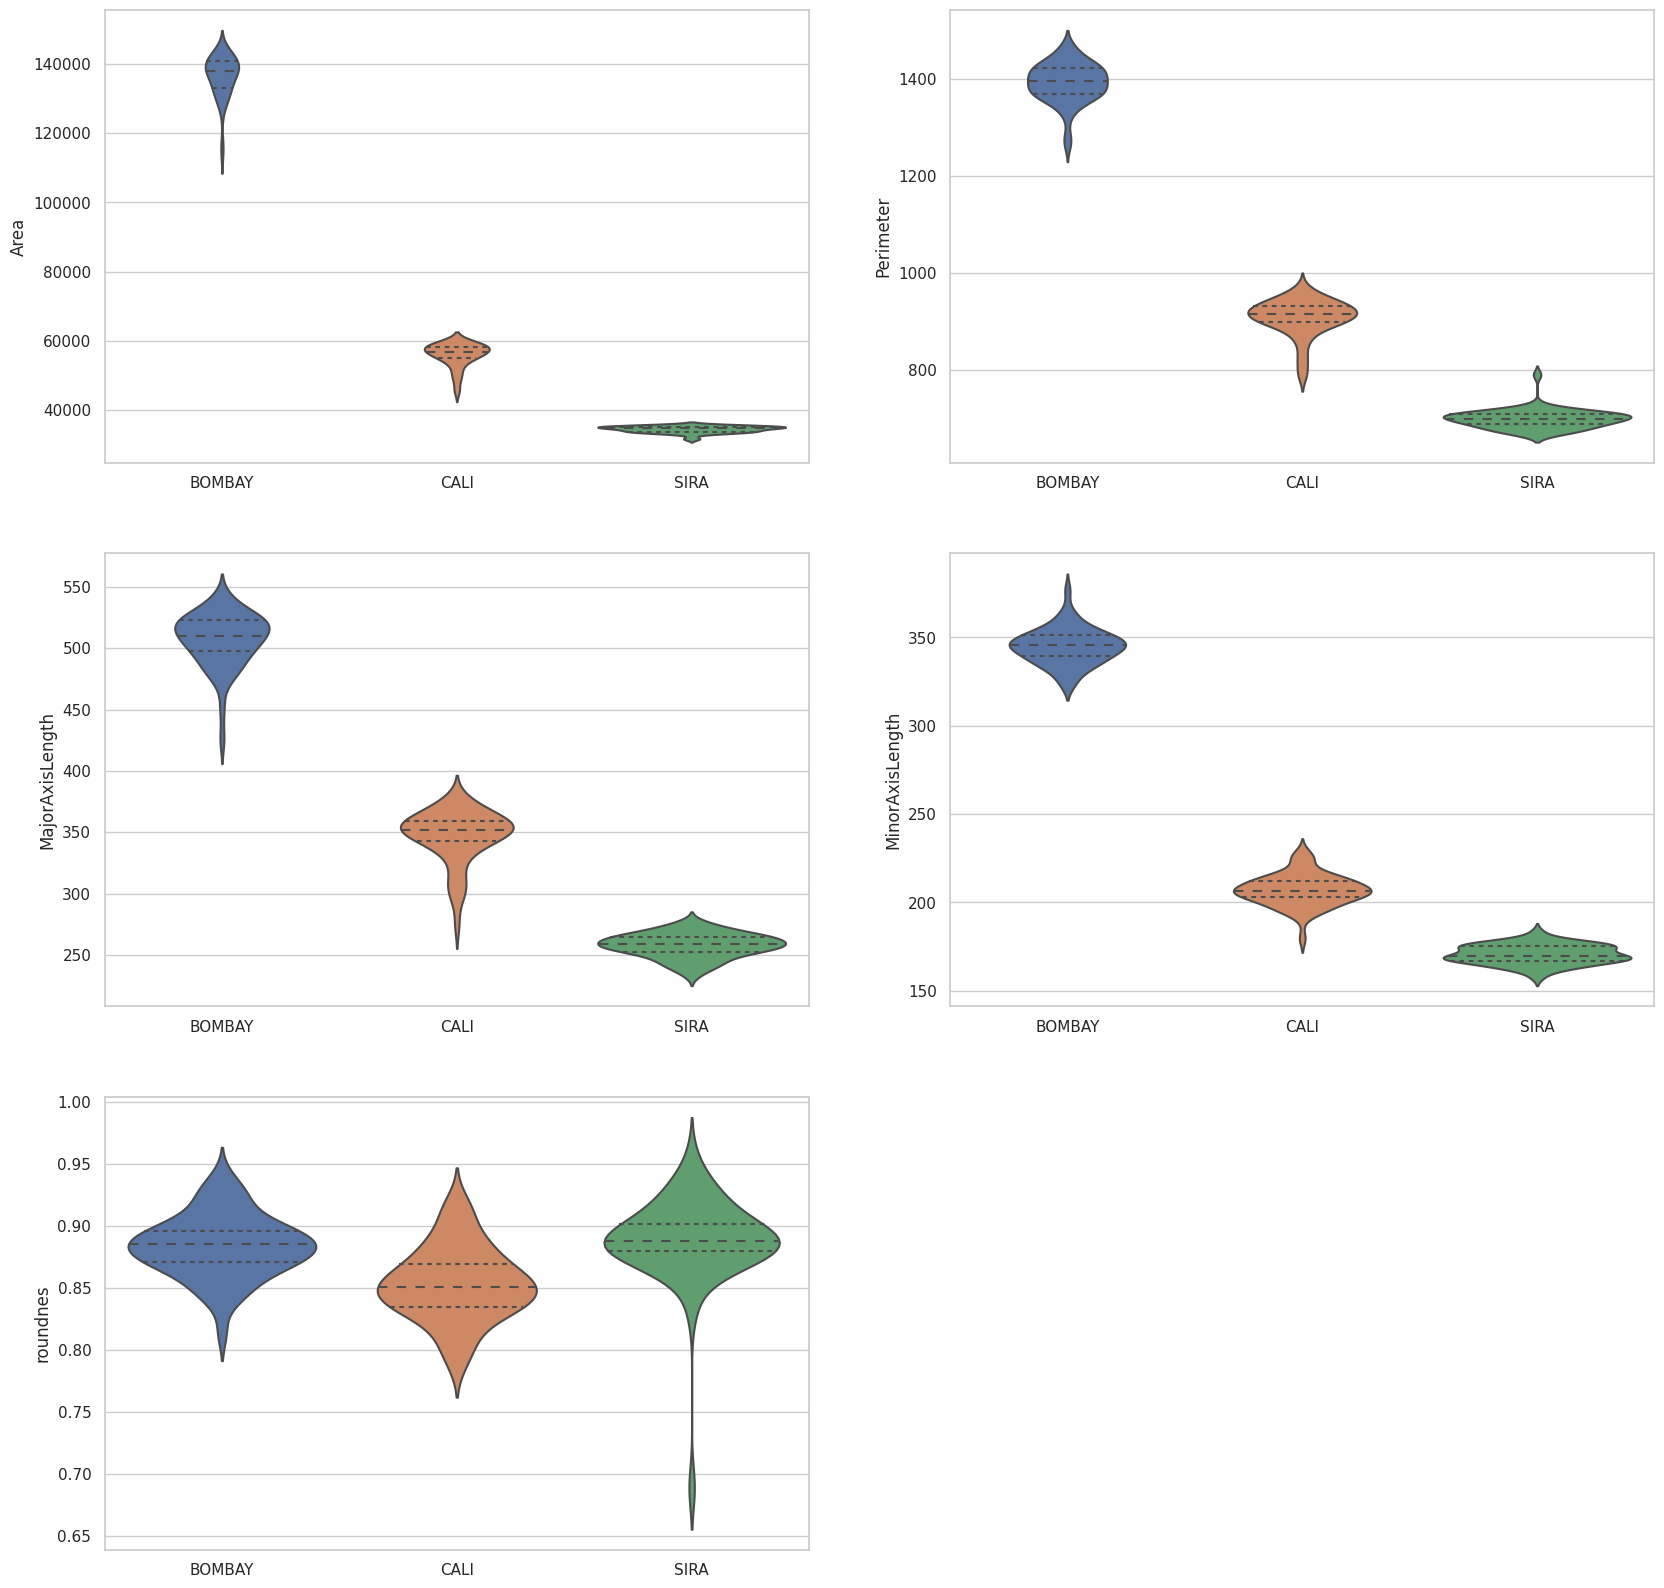

In [817]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

for feature, ax in zip(data.columns.drop("Class"), axes.flatten()):
    sns.violinplot(data=data, x="Class", y=feature, inner="quartile", ax=ax)
    ax.set(xlabel=None)

for i in range(len(data.columns.drop("Class")), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.show()

* **Boxplot of numerical features for each type of bean**

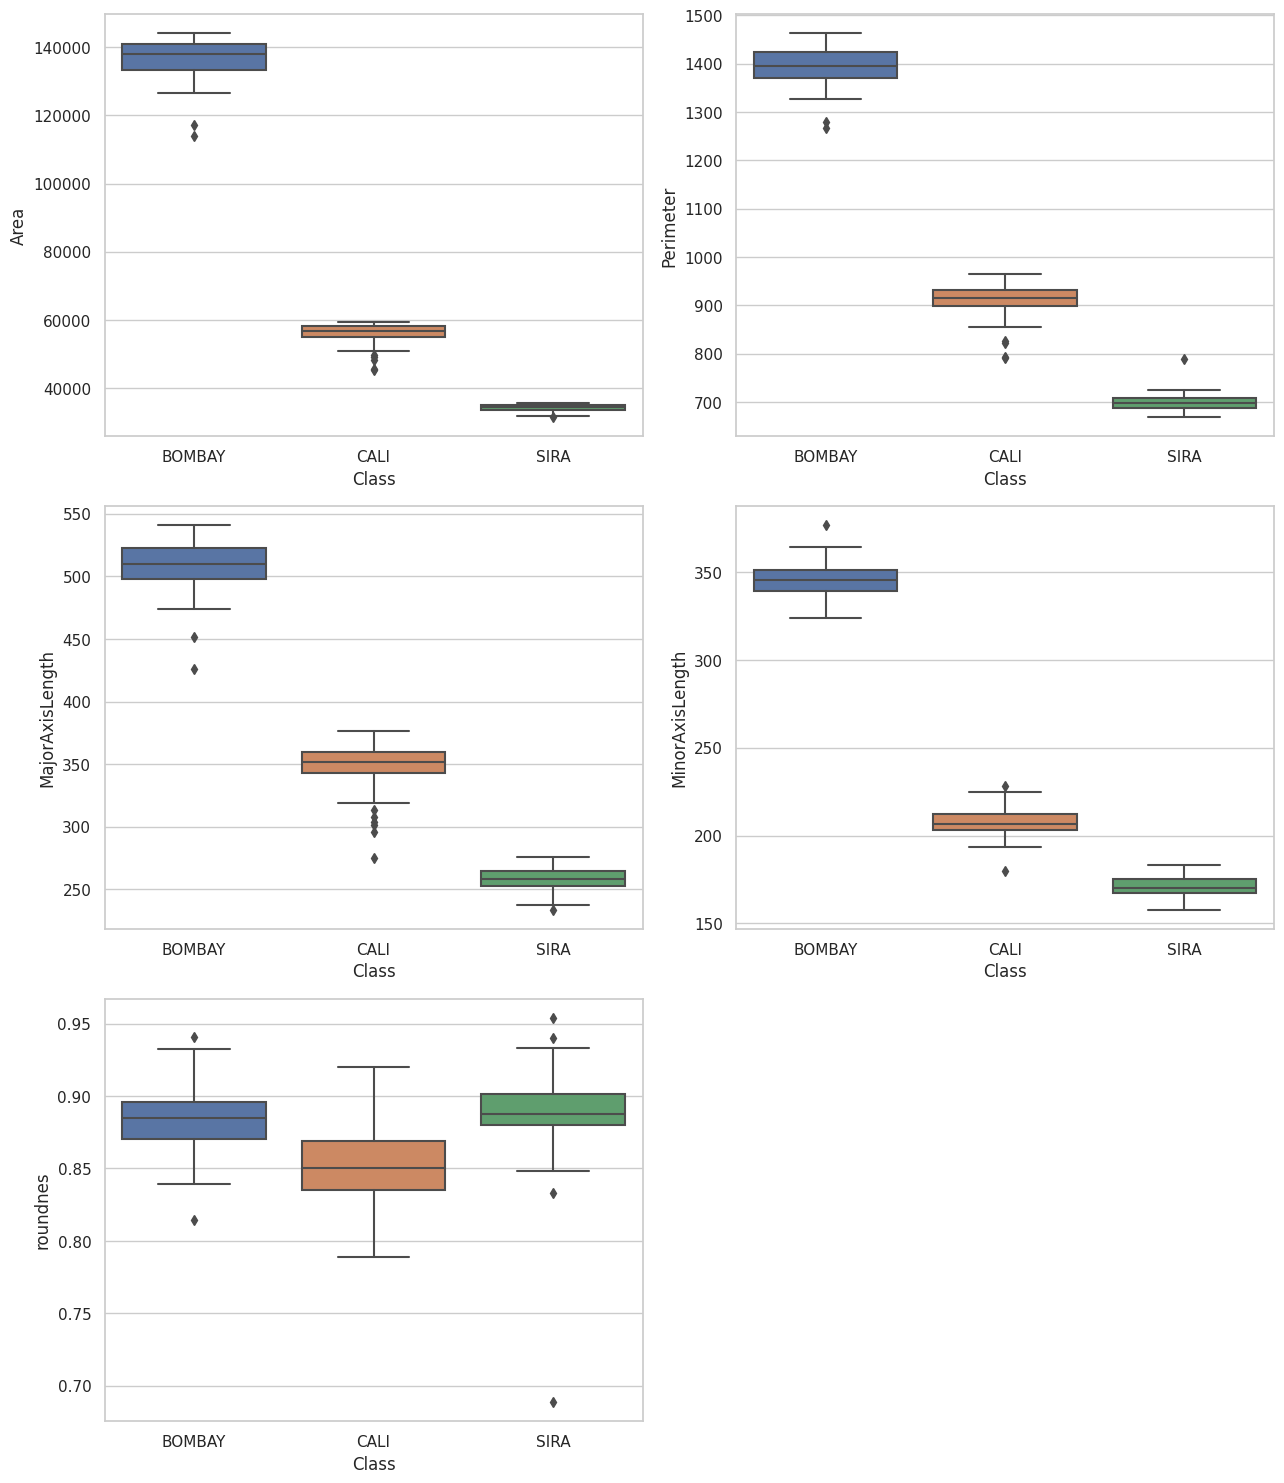

In [818]:
fig, ax = plt.subplots(3, 2, figsize=(13, 15))
for variable, subplot in zip(columns, ax.flatten()):
    sns.boxplot(x=data['Class'], y= data[variable], ax=subplot)
for i in range(len(columns), len(ax.flatten())):
    fig.delaxes(ax.flatten()[i])
plt.tight_layout()

* **Check for Missing values**

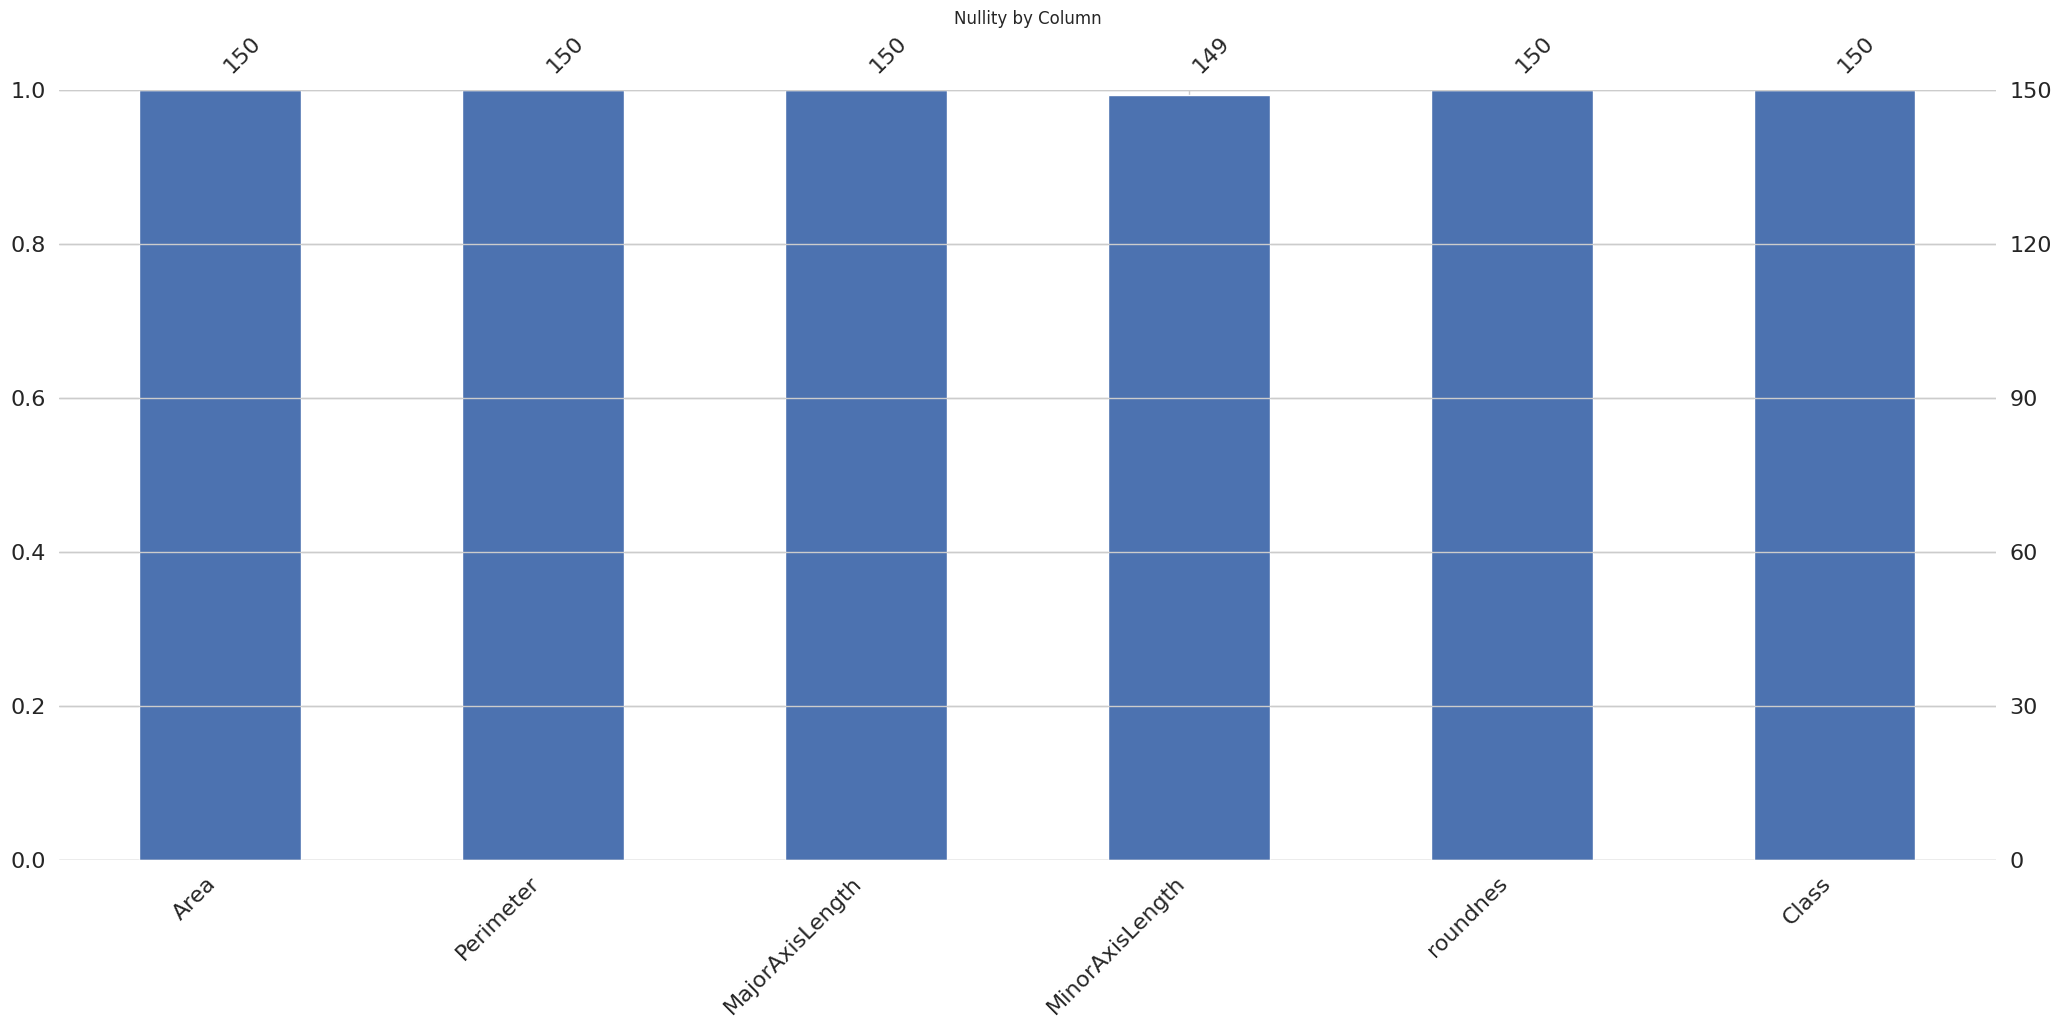

In [819]:
import missingno as msno
msno.bar(data,  color=(0.298, 0.447, 0.690))  
plt.title('Nullity by Column')
plt.show()

* **Check for outliers**

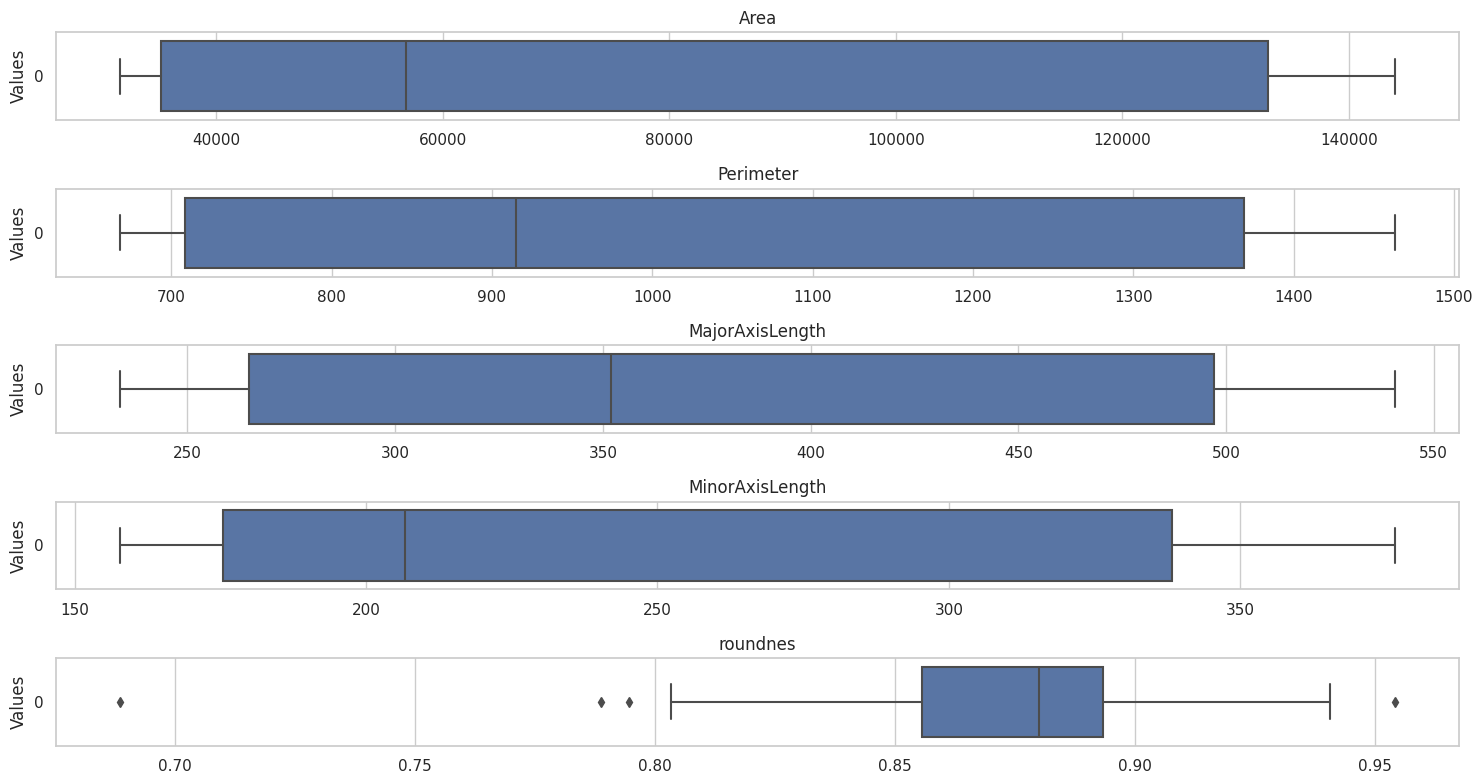

In [820]:
columns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength','roundnes']
num_rows = 5  
num_cols = 1  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8)) 
axes = axes.flatten()  

for i, column in enumerate(columns):
    ax = axes[i]  
    sns.boxplot(data=data[column], ax=ax,orient='h')  
    ax.set_title(column)  
    ax.set_xlabel('')  
    ax.set_ylabel('Values')  

fig.tight_layout()
plt.show()

* **visualize the relationship between Features and Class**

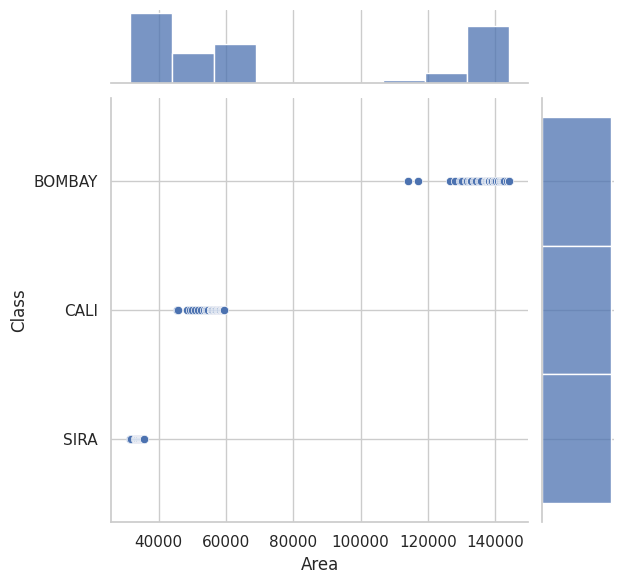

In [821]:
sns.jointplot(x='Area', y='Class', data=data, kind='scatter', palette='Set2')
plt.show()

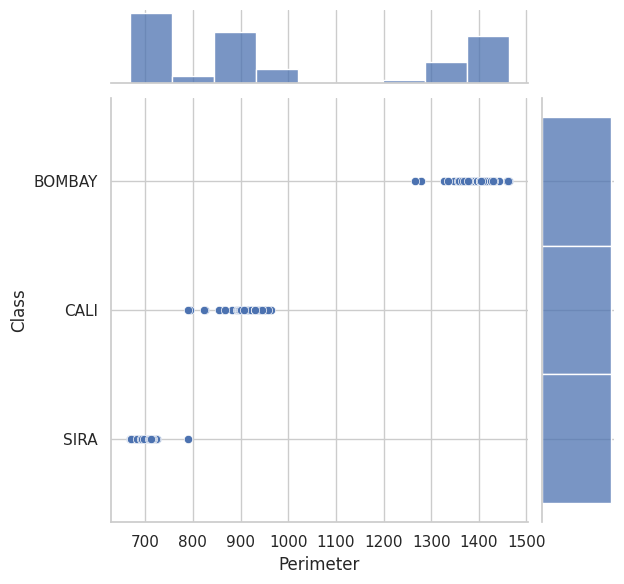

In [822]:
sns.jointplot(x='Perimeter',y='Class',data=data,kind='scatter',palette = 'Set2')

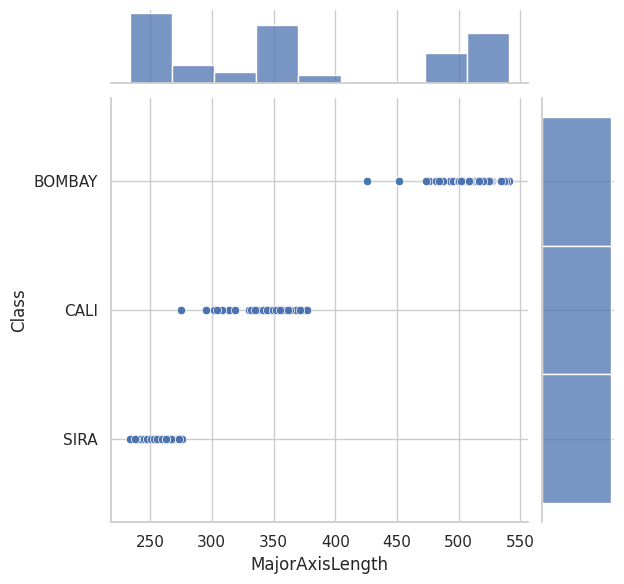

In [823]:
sns.jointplot(x='MajorAxisLength',y='Class',data=data,kind='scatter',palette = 'Set2')

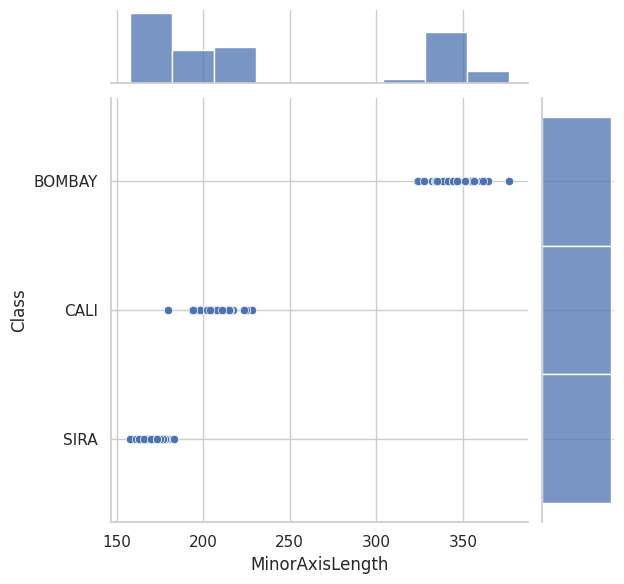

In [824]:
sns.jointplot(x='MinorAxisLength',y='Class',data=data,kind='scatter',palette = 'Set2')

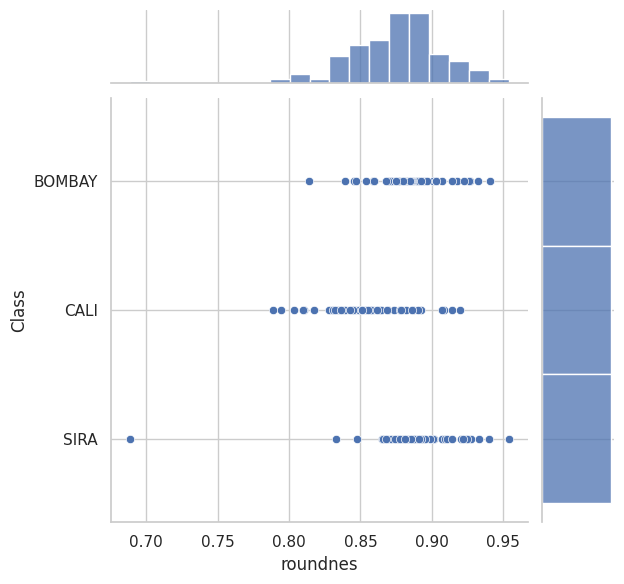

In [825]:
sns.jointplot(x='roundnes',y='Class',data=data,kind='scatter',palette = 'Set2')

* **Display beans per type**

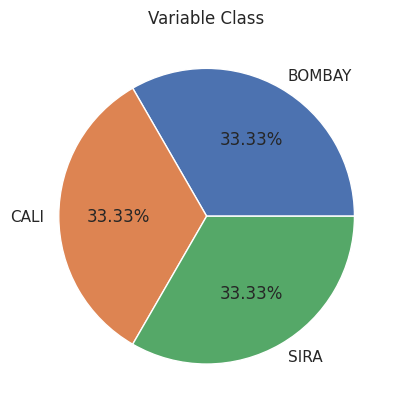

In [826]:
plt.gca().set_title('Variable Class')
label= [ 'BOMBAY', 'CALI', 'SIRA']
plt.pie(data["Class"].value_counts(), labels = label,autopct = '%2.2f%%')
plt.show()

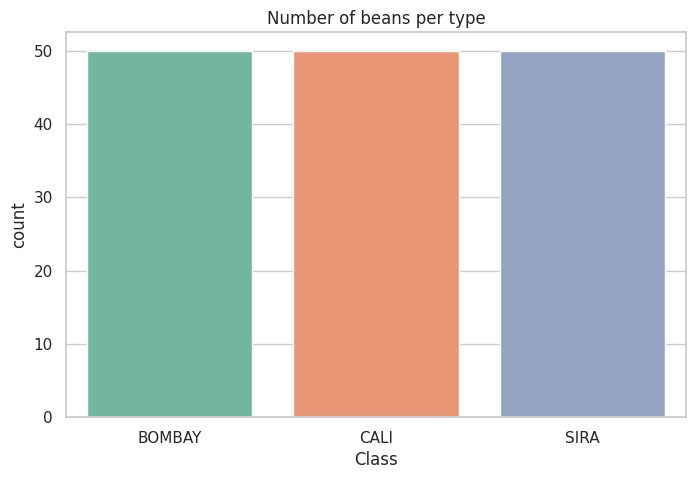

In [827]:
plt.figure(figsize = (8, 5))
sns.countplot(x = data["Class"], palette="Set2")
plt.title("Number of beans per type")
plt.show()

# Data Preprocessing

# Handle Missing Values

In [828]:
mean_minor = data['MinorAxisLength'].mean()
data['MinorAxisLength'].fillna(mean_minor, inplace=True)

In [829]:
data.isnull().sum().sort_values(ascending=False)

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
roundnes           0
Class              0
dtype: int64

# Label Encoding

In [830]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data_copy = data.copy()
label_encoder = LabelEncoder()
data_copy['Class'] = label_encoder.fit_transform(data['Class'])

**visualize the correlation between the columns**

In [831]:
correlation_matrix = data_copy.corr()
correlation_matrix

,Area,Perimeter,MajorAxisLength,MinorAxisLength,roundnes,Class
Area,1.000000,0.993360,0.979514,0.988820,0.080603,-0.944463
Perimeter,0.993360,1.000000,0.993176,0.978377,-0.014828,-0.968317
MajorAxisLength,0.979514,0.993176,1.000000,0.954189,-0.059295,-0.971448
MinorAxisLength,0.988820,0.978377,0.954189,1.000000,0.137194,-0.936881
roundnes,0.080603,-0.014828,-0.059295,0.137194,1.000000,0.048331
Class,-0.944463,-0.968317,-0.971448,-0.936881,0.048331,1.000000


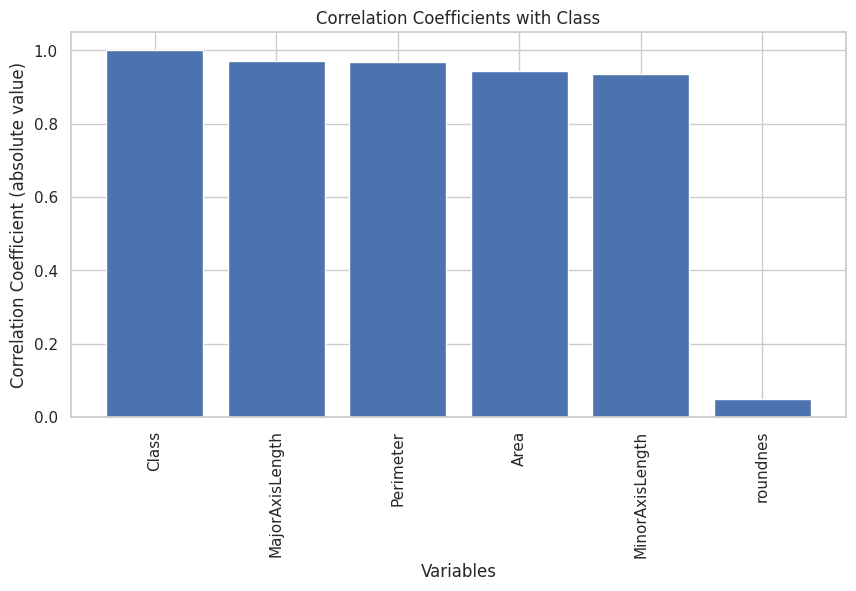

In [832]:
cor = data_copy.corr()
target = abs(cor['Class'])

# Sort the correlation coefficients in descending order
sorted_target = target.sort_values(ascending=False)

# Plot bar graph
plt.figure(figsize=(10, 5))
plt.bar(sorted_target.index, sorted_target.values)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient (absolute value)')
plt.title('Correlation Coefficients with Class')
plt.savefig('correlation.png')
plt.show()

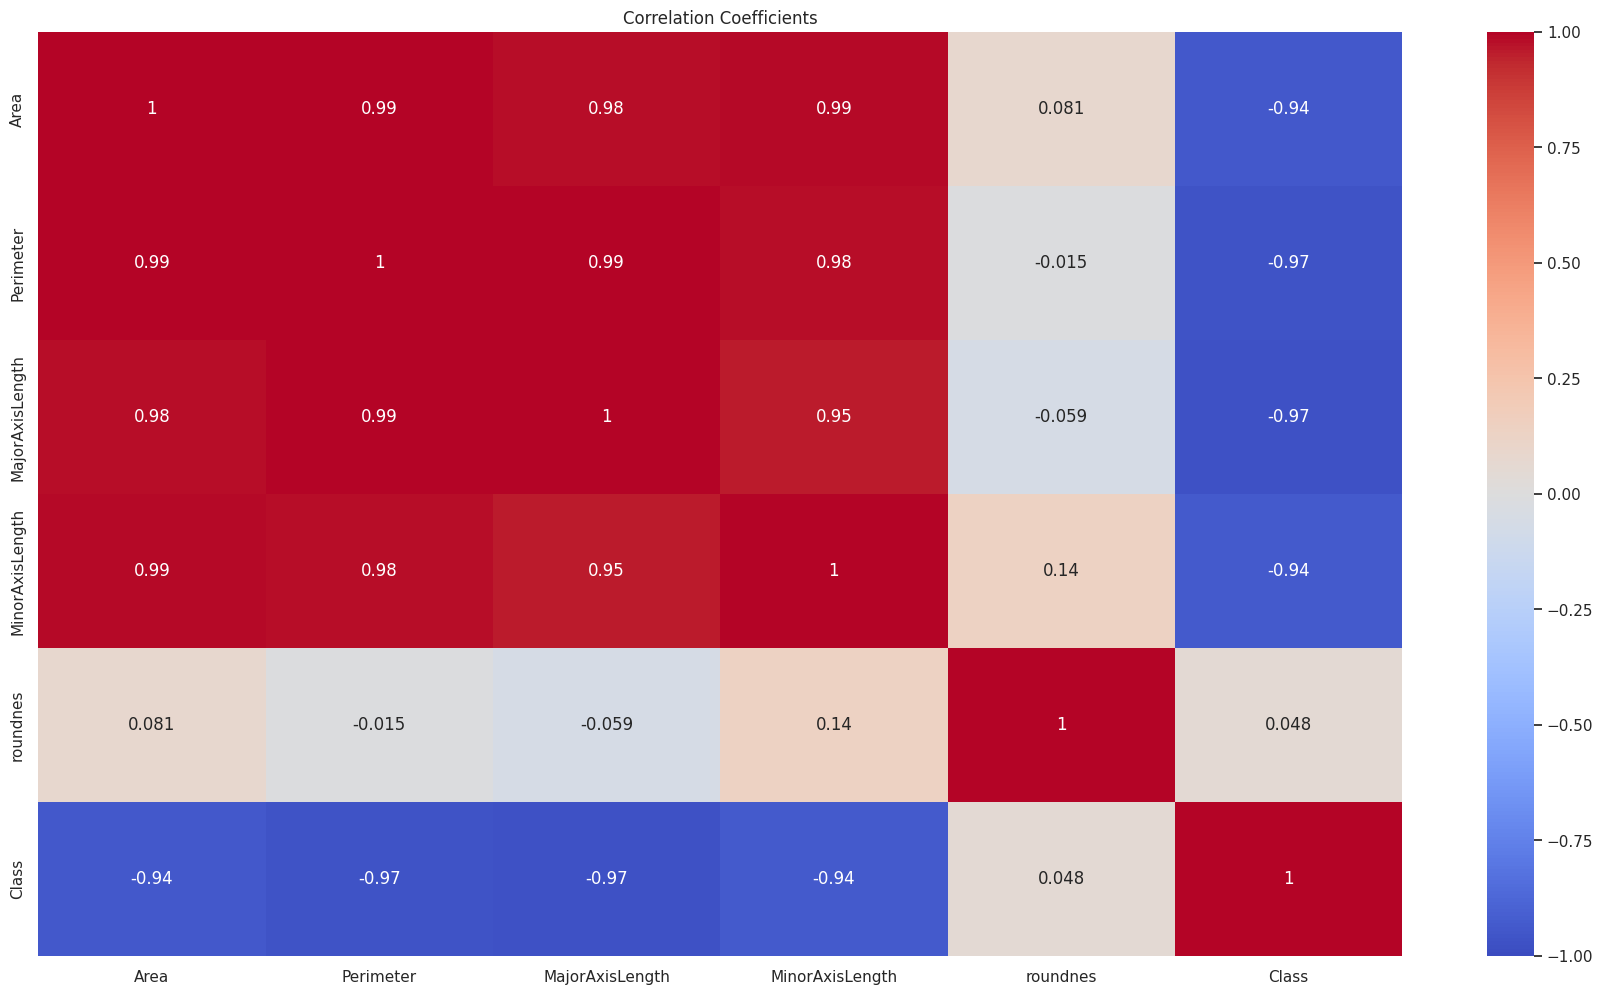

In [833]:
#plot heatmap
plt.subplots(figsize=(22, 12))
sns.heatmap(cor, cmap='coolwarm', annot=True, vmin=-1, vmax=1, center=0)
plt.title('Correlation Coefficients')
plt.savefig('heatmap.png')
plt.show()

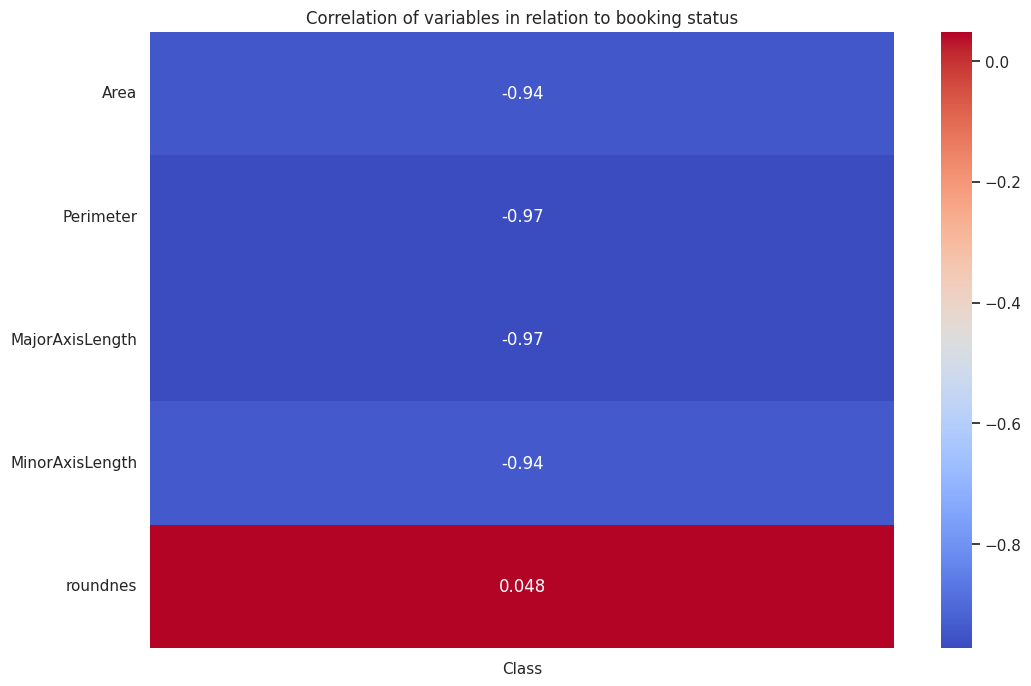

In [834]:
corr_matrix = data_copy.corr()["Class"]
corr_matrix = corr_matrix.drop("Class", axis=0)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.to_frame(), cmap="coolwarm", annot=True)
plt.title("Correlation of variables in relation to booking status")
plt.show()

# Model Engineering

* **Implementation of the Adaline (Adaptive Linear Neuron) algorithm**

Adaline is a single-layer artificial neural network that learns to make binary predictions based on a set of input features.

* **Simple Gradient descent optimizer**

In [854]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

class Adaline:
    def __init__(self, learning_rate=0.001, epochs=200):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def train(self, X, y):
        num_features = X.shape[1]
        np.random.seed(42)
        self.weights = np.random.randn(num_features)
        self.bias = np.random.randn()

        for _ in range(self.epochs):
            output = self.activation(self.net_input(X))
            error = y - output
            self.weights += self.learning_rate * np.dot(X.T, error)
            self.bias += self.learning_rate * np.sum(error)

    def net_input(self, X):
        return np.dot(X, self.weights) + self.bias

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [855]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'roundnes',
       'Class'],
      dtype='object')

In [856]:
data['Class'].unique()

array(['BOMBAY', 'CALI', 'SIRA'], dtype=object)

In [857]:
class1 = 'BOMBAY'                 
class2 = 'SIRA'                 

df_filtered = data[(data['Class'] == class1) | (data['Class'] == class2)]
    
X = df_filtered[['MinorAxisLength', 'MajorAxisLength']].values
y = df_filtered['Class'].values

# Encode the class labels
y = y.ravel()
label = LabelEncoder()
y = label.fit_transform(y)
y[y == 0] = -1

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

include_bias = True        #bias 

# Augment the feature vectors with a constant value of 1 for the bias term if include_bias is True
if include_bias:
    X = np.c_[X, np.ones(X.shape[0])]

# Split the dataset into train and test sets with a fixed random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=40, stratify=y, random_state=0)

In [858]:
adaline = Adaline(learning_rate=0.01, epochs=100)
adaline.train(X_train, y_train)

y_pred_adaline = adaline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_adaline)
print(f"Accuracy: {accuracy*100.0:.2f}%")

Accuracy: 100.00%


In [859]:
X_train.shape

(60, 3)

In [860]:
X_test.shape

(40, 3)

In [861]:
y_pred_adaline

array([-1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1,  1,  1, -1, -1])

In [862]:
y_test

array([-1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1,  1,  1, -1, -1])

In [863]:
num_samples_class1 = np.sum(y_test == -1)
num_samples_class1

20

In [864]:
num_samples_class2 = np.sum(y_test == 1)
num_samples_class2

20

* **Implementation of Perceptron learning algorithm**

In [865]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.bias = None
        self.weights = None

    def initialize_weights(self, no_features):
        np.random.seed(42)  
        self.weights = np.random.randn(no_features)
        self.bias = np.random.rand()

    def signum_activation(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        return np.where(self.signum_activation(X) >= 0.0, 1, -1)

    def train_perceptron(self, X, Y):
        self.initialize_weights(X.shape[1])
        np.random.seed(42)  
        for _ in range(self.n_iterations):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                if prediction != Y[i]:
                    error = Y[i] - prediction
                    self.weights += self.learning_rate * X[i] * error
                    self.bias += self.learning_rate * error

In [866]:
perceptorn = Perceptron(learning_rate=0.01, n_iterations=100)
perceptorn.train_perceptron(X_train, y_train)
y_pred_perceptorn = perceptorn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_perceptorn)
print(f"Accuracy: {accuracy*100.0:.2f}%")

Accuracy: 97.50%


# Model Evaluation

* **Adaline Algorithm Evaluation**

* **Confusion_matrix**

In [867]:
def confusion_matrix(y_true, y_pred):
    unique_classes = np.unique(y_true)
    num_classes = len(unique_classes)
    matrix = np.zeros((num_classes, num_classes), dtype=int)

    for i in range(num_classes):
        true_class = unique_classes[i]
        true_class_indices = (y_true == true_class)

        for j in range(num_classes):
            predicted_class = unique_classes[j]
            predicted_class_indices = (y_pred == predicted_class)

            matrix[i, j] = np.sum(true_class_indices & predicted_class_indices)

    return matrix

conf_matrix = confusion_matrix(y_test, y_pred_adaline)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[20  0]
 [ 0 20]]


* **Overall accuracy**

In [868]:
# Calculate the overall accuracy
overall_accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
print(f"Overall Accuracy: {overall_accuracy:.2f}")

Overall Accuracy: 1.00


* **Plot the decision boundary and scatter plot**

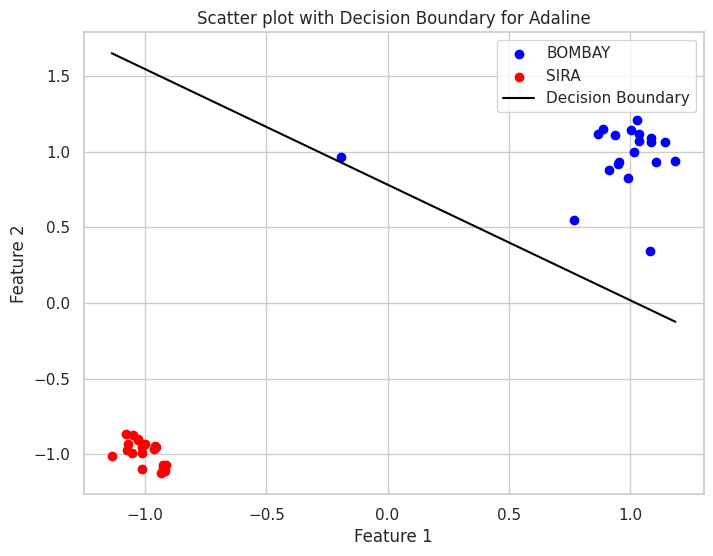

In [869]:
# Plot the decision boundary and scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot for Class 1
plt.scatter(X_test[y_test == -1, 0], X_test[y_test == -1, 1], color='blue', label=class1)

# Scatter plot for Class 2
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='red', label=class2)

if adaline.bias is not None:
    # Decision boundary with bias
    x1 = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
    x2 = -(adaline.weights[0] * x1 + adaline.bias) / adaline.weights[1]
else:
    # Decision boundary without bias
    x1 = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
    x2 = -(adaline.weights[0] * x1) / adaline.weights[1]

plt.plot(x1, x2, color='black', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot with Decision Boundary for Adaline')
plt.legend()
plt.grid(True)
plt.show()

* **Perceptron Algorithm Evaluation**

In [870]:
conf_matrix = confusion_matrix(y_test, y_pred_perceptorn)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[19  1]
 [ 0 20]]


In [871]:
# Calculate the overall accuracy
overall_accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
print(f"Overall Accuracy: {overall_accuracy:.2f}")

Overall Accuracy: 0.97


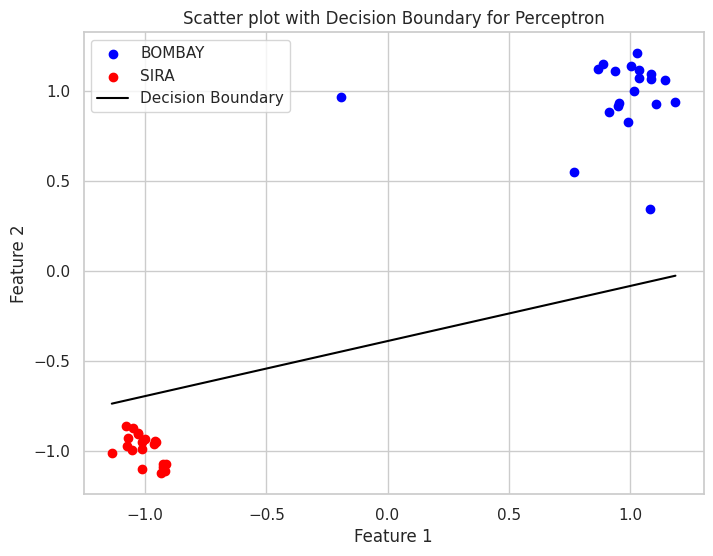

In [872]:
# Plot the decision boundary and scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot for Class 1
plt.scatter(X_test[y_test == -1, 0], X_test[y_test == -1, 1], color='blue', label=class1)

# Scatter plot for Class 2
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='red', label=class2)

if perceptorn.bias is not None:
    # Decision boundary with bias
    x1 = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
    x2 = -(perceptorn.weights[0] * x1 + perceptorn.bias) / perceptorn.weights[1]
else:
    # Decision boundary without bias
    x1 = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
    x2 = -(perceptorn.weights[0] * x1) / perceptorn.weights[1]

plt.plot(x1, x2, color='black', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot with Decision Boundary for Perceptron')
plt.legend()
plt.grid(True)
plt.show()


[Go to Top](#top)